In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
tr_x = '/content/drive/My Drive/NNFL/training_feature_matrix - Sheet1.csv'
tr_y = '/content/drive/My Drive/NNFL/training_output - Sheet1.csv'
ts_x = '/content/drive/My Drive/NNFL/test_feature_matrix - Sheet1.csv'
ts_y = '/content/drive/My Drive/NNFL/test_output - Sheet1.csv'

In [ ]:
xtr = pd.read_csv(tr_x, header = None)
ytr = pd.read_csv(tr_y, header = None)

xts = pd.read_csv(ts_x, header = None)
yts = pd.read_csv(ts_y, header = None)

In [ ]:
def normalize(x1, x2):
  x = np.concatenate([x1, x2], axis=0)
  xmean = np.mean(x)
  xstd = np.std(x)
  ret = (x - xmean) / (xstd)
  return ret

In [ ]:
X = normalize(xtr, xts)
Y = normalize(ytr, yts)

In [ ]:
m1 = xtr.shape[0]
m2 = xts.shape[0]
ones_tr = np.ones((m1, 1), dtype='float32')
ones_ts = np.ones((m2, 1), dtype='float32')
x_train = np.concatenate([ones_tr, X[:m1, :]], axis=1)
x_test = np.concatenate([ones_ts, X[m1:m1+m2, :]], axis=1)
y_train = Y[:m1]
y_test = Y[m1:m1+m2]

In [ ]:
def eval_loss_and_grad(w, x, y, ld):

  costval = 0
  n, m = x.shape
  gradval = [None] * m

  # finding cost value
  for i in range(n):
    temp = 0
    
    for j in range(m):
      temp = temp + x[i][j]*w[j]
    costval = costval + (temp - y[i])**2
  costval = costval / (2*n)

  temp = 0
  for i in range(m):
    temp += (w[i][0]**2)
  temp = temp * (ld/2.0)

  costval += temp


  # finding gradient value
  for k in range(m):
    for i in range(n):
      temp = 0
      for j in range(m):
        temp = temp + (x[i][j]*w[j])
      temp = temp*x[i][k]
    gradval[k] = temp + ld*w[k][0]
      
  gradval = np.array(gradval)
  return costval, gradval

In [ ]:
# hyperparameters
iterations = 6000
alpha = 0.01
w = np.random.randn(3, 1)
losses = []
w1 = []
w2 = []

lambda_ = 1.0

In [ ]:
for it in range(iterations):
  lossval, gradval = eval_loss_and_grad(w, x_train, y_train, lambda_)
  losses.append(lossval)
  w = w - alpha*gradval
  w1.append(w[1])
  w2.append(w[2])

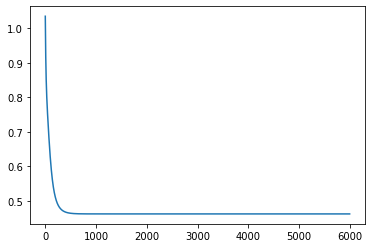

In [ ]:
plt.plot([iter for iter in range(iterations)], [los.flatten() for los in losses])

In [ ]:
losses[-1]

array([0.4616617])

In [ ]:
y_pred = np.dot(x_test, w)

In [ ]:
n, m = y_pred.shape
mse_error = 0

for i in range(n):
  mse_error = mse_error + (y_pred[i] - y_test[i])**2

mse_error = (1.0/n)*(mse_error**(0.5))

In [ ]:
print("Mean Squared error = " + str(mse_error[0]))

Mean Squared error = 0.10654686463207835


In [ ]:
w_1 = [f[0] for f in w1]
w_2 = [f[0] for f in w2]
losses_1 = [l[0] for l in losses]

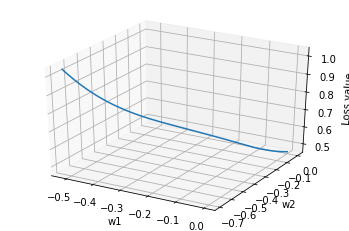

In [ ]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# ax.set_zlim3d(1.2, 1.7)
# ax.set_ylim3d(-1.5, -0.5)

ax.set_xlabel('w1')
ax.set_ylabel('w2')
ax.set_zlabel('Loss value')

ax.plot(w_1, w_2, losses_1)
plt.show()